In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys, os

#sys.path.append(os.path.abspath(os.path.join("../..")))
sys.path.append(os.path.abspath(os.path.join("../scripts")))

In [3]:
import explore
import plot

# Import The Data

In [4]:
# Data that contains information about the completed orders

data_url = explore.get_data_url("data/nb.csv", "v0")
df_CompleteOrders = pd.read_csv(data_url)

In [5]:
print("completed orders data has {} rows and {} columns".format(df_CompleteOrders.shape[0], df_CompleteOrders.shape[1]))

completed orders data has 536020 rows and 5 columns


In [6]:
df_CompleteOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [7]:
# able that contains delivery requests by clients (completed and unfulfilled) and driver locations during request

data_url = explore.get_data_url("data/driver_locations_during_request.csv", "v0")
df_driversloc = pd.read_csv(data_url)

In [8]:
print("driver locations during request data has {} rows and {} columns".format(df_driversloc.shape[0], df_driversloc.shape[1]))

driver locations during request data has 1557740 rows and 8 columns


In [9]:
df_driversloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


# Missing Values

In [11]:
explore.missing_values_table(df_CompleteOrders)

Your selected dataframe has 5 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Trip Start Time,1651,0.3,object
Trip End Time,1,0.0,object


In [12]:
# missing values are small percentabe. We drop them
df_CompleteOrders.dropna(inplace= True)
explore.missing_values_table(df_CompleteOrders)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


In [14]:
explore.missing_values_table(df_driversloc)

Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Dtype
created_at,1557740,100.0,float64
updated_at,1557740,100.0,float64


In [15]:
# two columns are empty. we drop them

df_driversloc.dropna(axis=1, inplace=True)
explore.missing_values_table(df_driversloc)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Dtype


# Data Overview

We take a look at the data. Types of variables and calculate basic statistics

In [16]:
df_CompleteOrders.dtypes

Trip ID              int64
Trip Origin         object
Trip Destination    object
Trip Start Time     object
Trip End Time       object
dtype: object

In [18]:
# Trip ID should all be unique values

dfbCompleteOrders['Trip ID'].nunique() == df_CompleteOrders.shape[0]



True

In [20]:
# We change the type of 
# 1. Time variables to datetime 
# 2. Origin and Destinations from strings to latitude and longitude


clean_orders = pd.DataFrame()

clean_orders['trip_id'] = df_CompleteOrders['Trip ID']

# change to datetime
clean_orders['trip_start_time'] = pd.to_datetime(df_CompleteOrders['Trip Start Time'])
clean_orders['trip_end_time'] = pd.to_datetime(df_CompleteOrders['Trip End Time'])

# split into latitude longitude
clean_orders['origin_lat'] = df_CompleteOrders['Trip Origin'].apply(lambda x: float(x.split(',')[0]))
clean_orders['origin_long'] = df_CompleteOrders['Trip Origin'].apply(lambda x: float(x.split(',')[1]))

clean_orders['destination_lat'] = df_CompleteOrders['Trip Destination'].apply(lambda x: float(x.split(',')[0]))
clean_orders['destination_long'] = df_CompleteOrders['Trip Destination'].apply(lambda x: float(x.split(',')[1]))

In [22]:
clean_orders.describe()

,trip_id,origin_lat,origin_long,destination_lat,destination_long
count,5.343680e+05,534368.000000,534368.000000,534368.000000,534368.000000
mean,9.900856e+05,6.528411,3.397347,6.523162,3.407517
std,3.454114e+05,0.094283,0.087884,0.108089,0.102586
min,3.919960e+05,1.000000,1.000000,1.000000,-0.293233
25%,6.929775e+05,6.450964,3.345035,6.447900,3.346074
50%,9.898045e+05,6.519571,3.374900,6.507296,3.382382
75%,1.279707e+06,6.594634,3.456603,6.593280,3.473266
max,1.637709e+06,9.218182,8.522293,9.056223,8.607887


In [27]:
print("Data on fulfilled orders ranges from {} to {}".format(clean_orders['trip_start_time'].min(), clean_orders['trip_start_time'].max()))

Data on fulfilled orders ranges from 2021-07-01 06:21:02 to 2022-06-13 10:04:28


# Calculate Trips' distances and time durations

## Calculate Durations

In [ ]:
# Change time data to datetime stamps

cleanData_completed['Trip Start Time'] = pd.to_datetime(cleanData_completed['Trip Start Time'])
cleanData_completed['Trip End Time'] = pd.to_datetime(cleanData_completed['Trip End Time'])

/tmp/ipykernel_5446/2400765178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData_completed['Trip Start Time'] = pd.to_datetime(cleanData_completed['Trip Start Time'])


In [36]:
cleanData_completed['TripDuration'] = cleanData_completed['Trip End Time']- cleanData_completed['Trip Start Time']

/tmp/ipykernel_5446/1680609402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData_completed['TripDuration'] = cleanData_completed['Trip End Time']-  cleanData_completed['Trip Start Time']


In [52]:
# trip duration in seconds 

cleanData_completed['TripDuration-sec'] = cleanData_completed['TripDuration'].apply(lambda x: x.seconds)

/tmp/ipykernel_5446/66187955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData_completed['TripDuration-sec'] = cleanData_completed['TripDuration'].apply(lambda x: x.seconds)


## Calculate Distances

In [74]:
# Table of completed orders has 'Trip Origin' and 'Trip Destination' (latitude, longitude) as str type.
# We convert these into columns


cleanData_completed['TripOrigin-Lat'] = cleanData_completed['Trip Origin'].apply(lambda x: float(x.split(',')[0]))
cleanData_completed['TripOrigin-Long'] = cleanData_completed['Trip Origin'].apply(lambda x: float(x.split(',')[1]))

cleanData_completed['TripDest-Lat'] = cleanData_completed['Trip Destination'].apply(lambda x: float(x.split(',')[0]))
cleanData_completed['TripDest-Long'] = cleanData_completed['Trip Destination'].apply(lambda x: float(x.split(',')[1]))

/tmp/ipykernel_5446/2990419230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData_completed['TripOrigin-Lat'] = cleanData_completed['Trip Origin'].apply(lambda x: float(x.split(',')[0]))
/tmp/ipykernel_5446/2990419230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData_completed['TripOrigin-Long'] = cleanData_completed['Trip Origin'].apply(lambda x: float(x.split(',')[1]))
/tmp/ipykernel_5446/2990419230.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

### Since we have latitude-longitude for starting point and end point. we calculate the straight line distance and not the actual distance traveled along roads

In [55]:
from geopy import distance

In [ ]:
# we use geopy liberary for calculating distances from lat-long values

# Geopy can calculate geodesic distance between two points using the geodesic distance or the great-circle distance, 
# with a default of the geodesic distance available as the function

In [76]:
cleanData_completed['Distance'] = cleanData_completed.apply(lambda x:distance.distance((x['TripOrigin-Lat'],x['TripOrigin-Long']), 
(x['TripDest-Lat'],x['TripDest-Long'])).km,axis=1)

/tmp/ipykernel_5446/3275657463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanData_completed['Distance'] = cleanData_completed.apply(lambda x:distance.distance((x['TripOrigin-Lat'],x['TripOrigin-Long']),


In [77]:
cleanData_completed.dtypes

Trip ID                       int64
Trip Origin                  object
Trip Destination             object
Trip Start Time      datetime64[ns]
Trip End Time        datetime64[ns]
TripOrigin-Lat              float64
TripOrigin-Long             float64
TripDest-Lat                float64
TripDest-Long               float64
TripDuration        timedelta64[ns]
TripDuration-sec              int64
Distance                    float64
dtype: object

# Univariate Analysis

### 1. drivers accepting and rejecting orders

In [82]:
cleanData_driversloc.driver_action.value_counts()

rejected    1531837
accepted      25903
Name: driver_action, dtype: int64

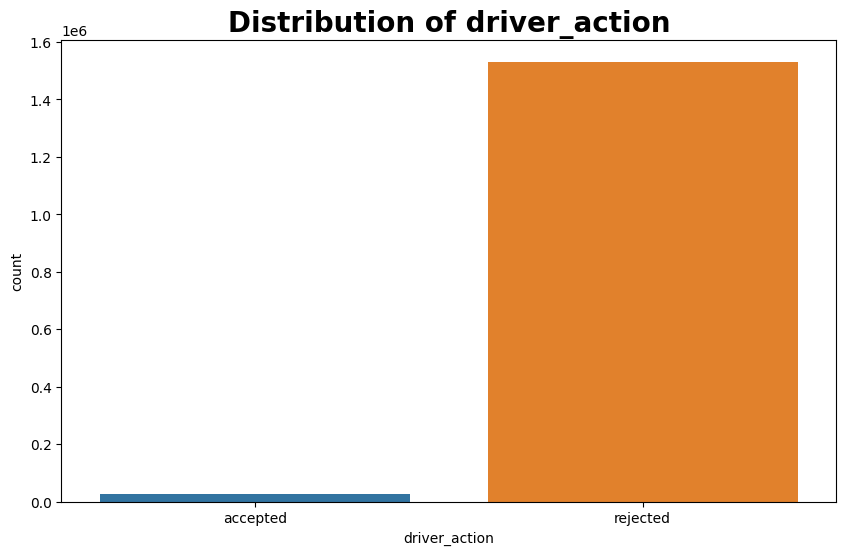

In [83]:
plot.plot_count(cleanData_driversloc, 'driver_action')

### Distances

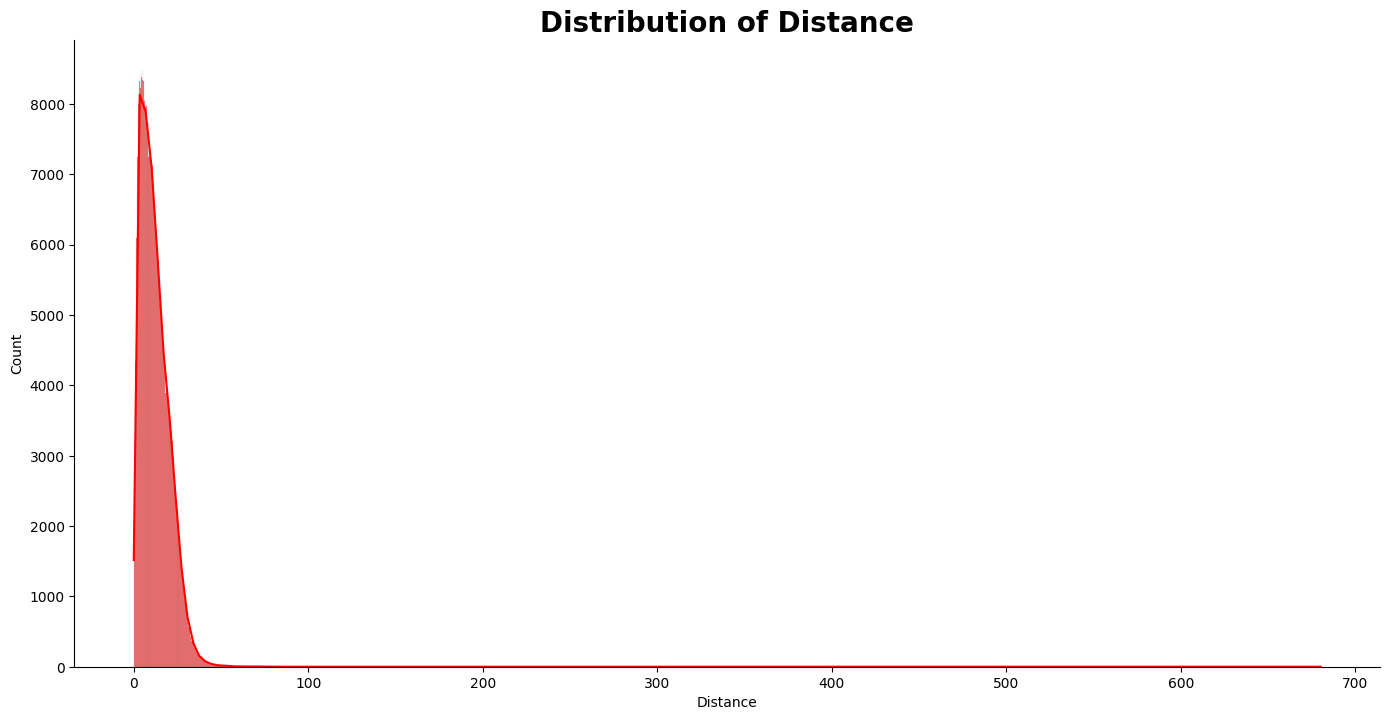

In [84]:
plot.plot_hist(cleanData_completed, 'Distance', 'red')

### Durations in Seconds

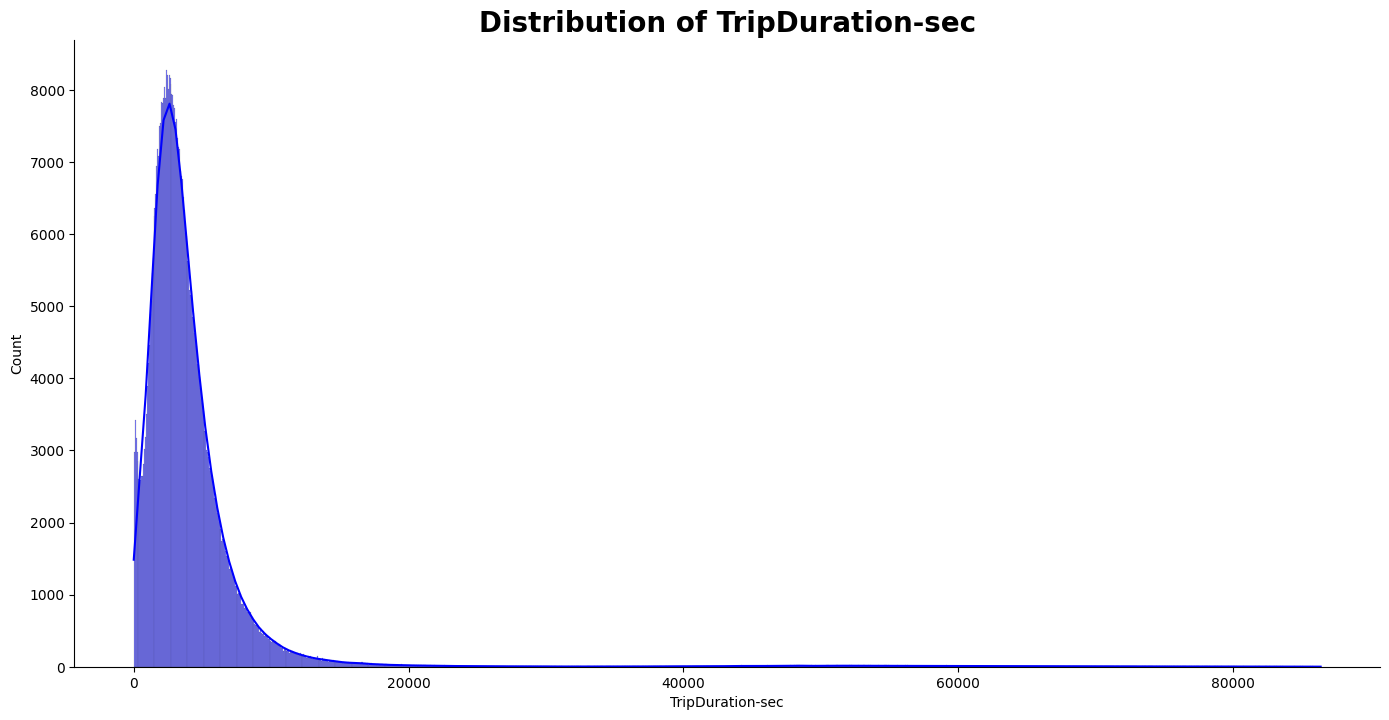

In [85]:
plot.plot_hist(cleanData_completed, 'TripDuration-sec', 'blue')

We can clearly see that there are outliers (large distances and long trip durations) .. and also trips that are too short.

In [87]:
# trips shorter than 5 minutes

len(cleanData_completed[cleanData_completed['TripDuration-sec']<300])

13578

In [88]:
# trips shorter than 2 minutes

len(cleanData_completed[cleanData_completed['TripDuration-sec']<120])

5466